We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

Let’s display the first five rows of data

In [23]:
df=pd.read_csv('Desktop/airlines_passengers.csv')

In [24]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We can see that the data contains a column labeled “Month” that contains dates. In that column, 
the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data 

In [25]:
df.tail(5)

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [26]:
df['Month']=pd.to_datetime(df['Month'])
df['Month']

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

The next thing we can do is convert the month column to an index. 


In [27]:
df=df.set_index('Month')


Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

Text(0, 0.5, 'Number of passengers')

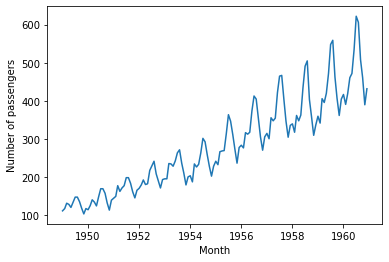

In [32]:
sns.lineplot(x=df.index,y=df['Passengers'])
plt.ylabel('Number of passengers')

Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [39]:
ad=adfuller(df['Passengers'],autolag='AIC')
ad=pd.DataFrame(ad)
ad

,0
0,0.815369
1,0.99188
2,13
3,130
4,"{'1%': -3.4816817173418295, '5%': -2.884041834..."
5,996.692931


Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

Store our results in a dataframe display it

Explain the results

Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

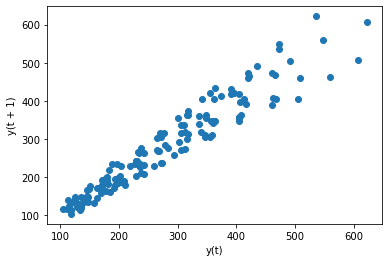

In [41]:
from pandas.plotting import lag_plot
pd.plotting.lag_plot(df['Passengers'])

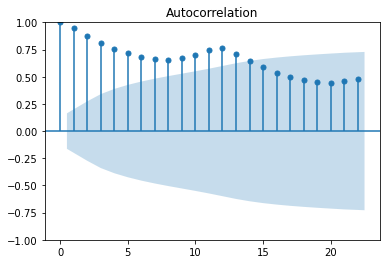

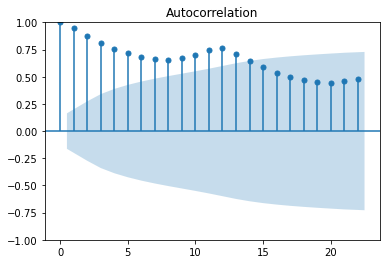

In [48]:

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Passengers'])

Calculate partial autocorrelation

C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


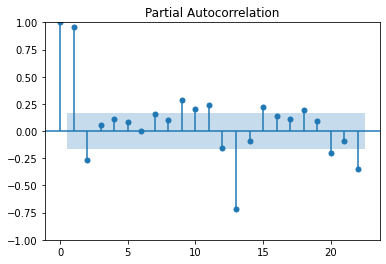

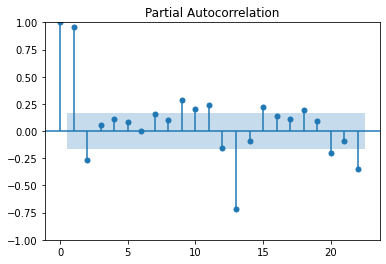

In [47]:

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Passengers'])

Decomposition
Trend decomposition is another useful way to visualize the trends in time series data.
To proceed, let’s import seasonal_decompose from the statsmodels package:
from statsmodels.tsa.seasonal import seasonal_decompose


In [45]:
 from statsmodels.tsa.seasonal import seasonal_decompose

Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = 
decompose.plot()
plt.show()


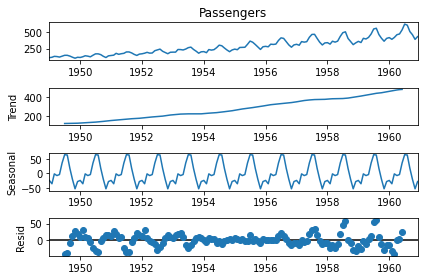

In [46]:
seasonal=sm.tsa.seasonal_decompose(df['Passengers']).plot()


Can you describe the charts?


Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

0        8
1      -17
2       -5
3       22
4       -1
      ... 
137   -103
138    -82
139     51
140    -24
141    113
Length: 142, dtype: int64

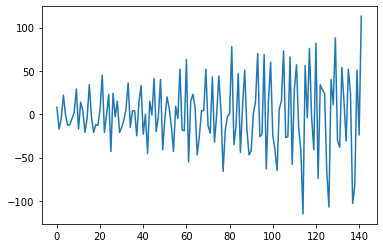

In [65]:
diff_df=np.diff(df['Passengers'],2)
adfuller(diff_df)
diff_df=pd.Series(diff_df)
pd.Series(diff_df).plot()
adfuller(diff_df)
diff_df

MA(1)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  133
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -648.762
Date:                Sun, 04 Sep 2022   AIC                           1303.524
Time:                        20:24:32   BIC                           1312.195
Sample:                             0   HQIC                          1307.047
                                - 133                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.066     -0.003      0.998      -0.130       0.129
ma.L1         -0.9999      7.225     -0.138      0.890     -15.160      13.160
sigma2       973.8027   7067.753      0.138      0.8

<AxesSubplot:>

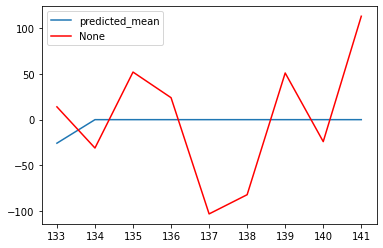

In [68]:
train=diff_df[0:-9]
test=diff_df[-9:]
model=sm.tsa.arima.ARIMA(train, order=(0,0,1))
model_fit = model.fit()
print(model_fit.summary())
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end,typ='levels')

pred.plot(legend=True)
test.plot(legend=True,color='r')


Display the output

MA(2)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  133
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -641.210
Date:                Sun, 04 Sep 2022   AIC                           1290.419
Time:                        20:24:54   BIC                           1301.981
Sample:                             0   HQIC                          1295.117
                                - 133                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0043      0.077      0.056      0.956      -0.146       0.155
ma.L1         -0.6236      0.902     -0.691      0.489      -2.392       1.145
ma.L2         -0.3747      0.389     -0.962      0.3

<AxesSubplot:>

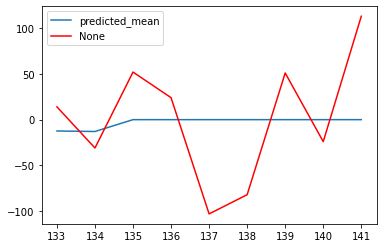

In [69]:
train=diff_df[0:-9]
test=diff_df[-9:]
model=sm.tsa.arima.ARIMA(train, order=(0,0,2))
model_fit = model.fit()
print(model_fit.summary())
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end,typ='levels')

pred.plot(legend=True)
test.plot(legend=True,color='r')

Display the output

AR(2)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  133
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -662.681
Date:                Sun, 04 Sep 2022   AIC                           1333.362
Time:                        20:25:22   BIC                           1344.923
Sample:                             0   HQIC                          1338.060
                                - 133                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0618      2.070      0.030      0.976      -3.996       4.120
ar.L1         -0.2743      0.100     -2.747      0.006      -0.470      -0.079
ar.L2         -0.2575      0.104     -2.472      0.0

<AxesSubplot:>

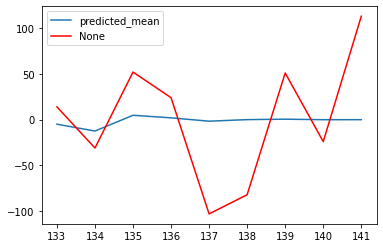

In [70]:
train=diff_df[0:-9]
test=diff_df[-9:]
model=sm.tsa.arima.ARIMA(train, order=(2,0,0))
model_fit = model.fit()
print(model_fit.summary())
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end,typ='levels')

pred.plot(legend=True)
test.plot(legend=True,color='r')

ARMA (?,?)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  133
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -640.106
Date:                Sun, 04 Sep 2022   AIC                           1290.213
Time:                        20:25:32   BIC                           1304.665
Sample:                             0   HQIC                          1296.085
                                - 133                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0042      0.073      0.058      0.954      -0.138       0.146
ar.L1          0.3455      0.109      3.166      0.002       0.132       0.559
ar.L2         -0.2101      0.081     -2.578      0.0

<AxesSubplot:>

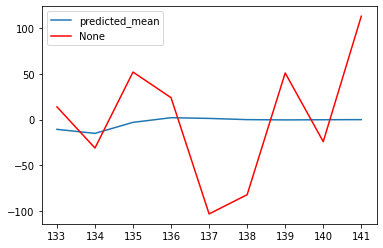

In [71]:
train=diff_df[0:-9]
test=diff_df[-9:]
model=sm.tsa.arima.ARIMA(train, order=(2,0,1))
model_fit = model.fit()
print(model_fit.summary())
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end,typ='levels')

pred.plot(legend=True)
test.plot(legend=True,color='r')

Display the output

ARIMA(?,?)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  133
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -635.811
Date:                Sun, 04 Sep 2022   AIC                           1283.623
Time:                        20:25:41   BIC                           1300.965
Sample:                             0   HQIC                          1290.670
                                - 133                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.093     -0.005      0.996      -0.182       0.181
ar.L1         -0.5167      0.129     -4.010      0.000      -0.769      -0.264
ar.L2          0.0970      0.127      0.764      0.4

C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

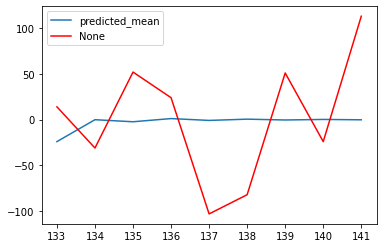

In [72]:
train=diff_df[0:-9]
test=diff_df[-9:]
model=sm.tsa.arima.ARIMA(train, order=(2,0,2))
model_fit = model.fit()
print(model_fit.summary())
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end,typ='levels')

pred.plot(legend=True)
test.plot(legend=True,color='r')

Display the output

Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

Calculate AIC